In [ ]:
# https://www.kaggle.com/amar09/time-series-delhi-weather-forecasting-arima

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
weather_df = pd.read_csv('C:/Users/fu/Downloads/edit_plant1_train.csv', parse_dates=['plant1_train.mea_ddhr'], index_col='plant1_train.mea_ddhr')
weather_df.head()

,Unnamed: 0,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
plant1_train.mea_ddhr,,,,,,,,,,,,,,,
2016-04-01 00:00:00,1.0,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0
2016-04-01 03:00:00,2.0,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0.0,0.0,0.0
2016-04-01 06:00:00,3.0,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0.0,0.0,0.0
2016-04-01 09:00:00,4.0,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0.0,0.0,0.0
2016-04-01 12:00:00,5.0,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0.0,0.0,0.0


In [3]:
weather_df.drop(['Unnamed: 0'],axis=1, inplace=True)

In [4]:
weather_df.drop(['plant1_train.cond_loc1','plant1_train.cond_loc2','plant1_train.cond_loc3'],axis=1, inplace=True)

In [6]:
# lets check dtype of all columns, 
weather_df.dtypes, weather_df.index.dtype

(plant1_train.tem_in_loc1      float64
 plant1_train.hum_in_loc1      float64
 plant1_train.tem_coil_loc1    float64
 plant1_train.tem_in_loc2      float64
 plant1_train.hum_in_loc2      float64
 plant1_train.tem_coil_loc2    float64
 plant1_train.tem_in_loc3      float64
 plant1_train.hum_in_loc3      float64
 plant1_train.tem_coil_loc3    float64
 plant1_train.tem_out_loc1     float64
 plant1_train.hum_out_loc1     float64
 dtype: object, dtype('<M8[ns]'))

In [7]:
weather_df.index = pd.to_datetime(weather_df.index)
weather_df.index

DatetimeIndex(['2016-04-01 00:00:00', '2016-04-01 03:00:00',
               '2016-04-01 06:00:00', '2016-04-01 09:00:00',
               '2016-04-01 12:00:00', '2016-04-01 15:00:00',
               '2016-04-01 18:00:00', '2016-04-01 21:00:00',
               '2016-04-02 00:00:00', '2016-04-02 03:00:00',
               ...
               '2020-03-24 00:30:00', '2020-03-24 07:00:00',
               '2020-03-24 19:00:00', '2020-03-25 14:00:00',
               '2020-03-27 14:00:00', '2020-03-27 19:00:00',
               '2020-03-28 07:30:00', '2020-03-28 13:30:00',
               '2020-03-28 23:30:00', '2020-03-29 02:30:00'],
              dtype='datetime64[ns]', name='plant1_train.mea_ddhr', length=60590, freq=None)

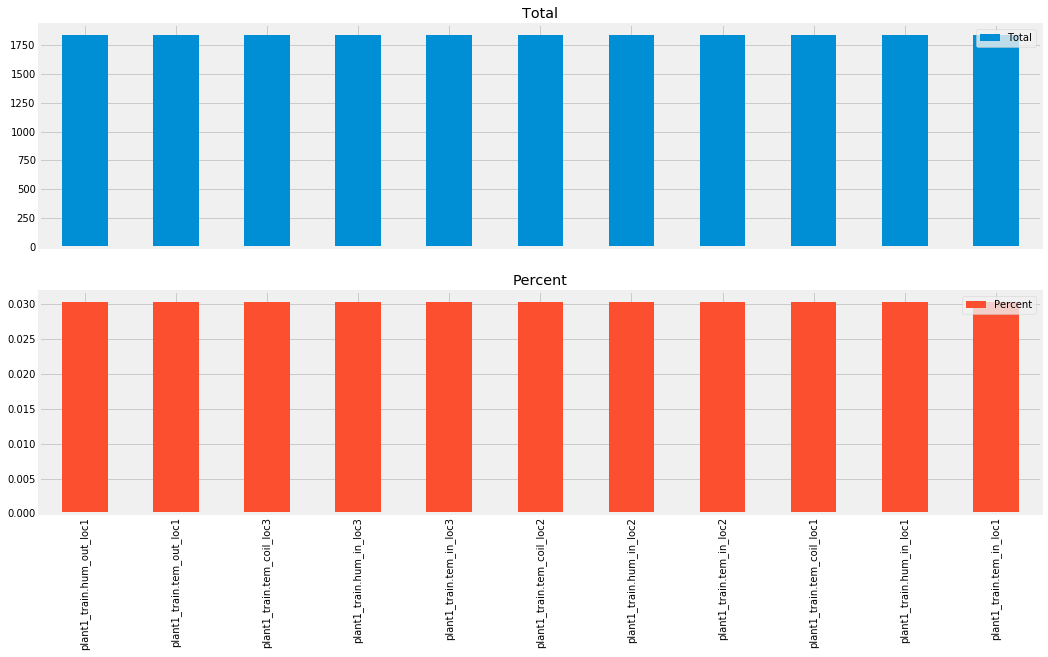

In [8]:
def list_and_visualize_missing_data(dataset):
    # Listing total null items and its percent with respect to all nulls
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())/(dataset.isnull().count())).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total > 0]
    
    missing_data.plot.bar(subplots=True, figsize=(16,9))

list_and_visualize_missing_data(weather_df)

In [9]:
# will fill with previous valid value
weather_df.ffill(inplace=True)
weather_df[weather_df.isnull()].count()

plant1_train.tem_in_loc1      0
plant1_train.hum_in_loc1      0
plant1_train.tem_coil_loc1    0
plant1_train.tem_in_loc2      0
plant1_train.hum_in_loc2      0
plant1_train.tem_coil_loc2    0
plant1_train.tem_in_loc3      0
plant1_train.hum_in_loc3      0
plant1_train.tem_coil_loc3    0
plant1_train.tem_out_loc1     0
plant1_train.hum_out_loc1     0
dtype: int64

In [10]:
weather_df.describe()

,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1
count,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000,60590.000000
mean,17.189528,50.434837,16.137769,16.088052,52.473388,15.344652,15.232231,56.024176,14.654527,13.139962,59.968216
std,9.738289,13.032193,9.784108,10.043077,13.734408,10.044666,10.037532,13.642525,10.254951,10.747175,16.656002
min,-7.980000,10.000000,-7.610000,-8.280000,8.000000,-6.040000,-8.930000,9.000000,-7.450000,-13.690000,5.000000
25%,8.960000,39.840000,7.730000,7.310000,41.510000,6.630000,6.520000,45.120000,5.670000,4.200000,46.310000
50%,15.920000,49.970000,15.020000,14.730000,52.380000,13.950000,13.970000,56.000000,13.300000,12.010000,59.190000
75%,26.120000,60.070000,25.320000,25.200000,63.160000,24.830000,24.320000,66.640000,24.290000,22.580000,73.720000
max,37.080000,89.800000,34.860000,36.530000,91.420000,34.060000,35.920000,93.160000,33.680000,38.570000,98.690000


In [ ]:
weather_df = weather_df[weather_df.temprature < 50]
weather_df = weather_df[weather_df.humidity <= 100]

In [ ]:
weather_condition = (weather_df.condition.value_counts()/(weather_df.condition.value_counts().sum()))*100
weather_condition.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

In [ ]:
weather_df.plot(subplots=True, figsize=(20,12))

In [ ]:
weather_df['2016':'2017'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

In [43]:
train_df = weather_df['2016-01':'2019-02'].resample('3H').mean().fillna(method='pad')
train_df.drop(['plant1_train.hum_in_loc1','plant1_train.tem_coil_loc1','plant1_train.tem_in_loc2','plant1_train.hum_in_loc2','plant1_train.tem_coil_loc2','plant1_train.tem_in_loc3','plant1_train.hum_in_loc3','plant1_train.tem_coil_loc3','plant1_train.tem_out_loc1','plant1_train.hum_out_loc1'], axis=1, inplace=True)
test_df = weather_df['2019-03':'2019-06'].resample('3H').mean().fillna(method='pad')
test_df.drop(['plant1_train.hum_in_loc1','plant1_train.tem_coil_loc1','plant1_train.tem_in_loc2','plant1_train.hum_in_loc2','plant1_train.tem_coil_loc2','plant1_train.tem_in_loc3','plant1_train.hum_in_loc3','plant1_train.tem_coil_loc3','plant1_train.tem_out_loc1','plant1_train.hum_out_loc1'], axis=1, inplace=True)

In [44]:
print(test_df)

                       plant1_train.tem_in_loc1
plant1_train.mea_ddhr                          
2019-03-01 00:00:00                    9.876667
2019-03-01 03:00:00                    9.008889
2019-03-01 06:00:00                    8.499444
2019-03-01 09:00:00                    9.599444
2019-03-01 12:00:00                   11.799444
2019-03-01 15:00:00                   12.423333
2019-03-01 18:00:00                   11.982778
2019-03-01 21:00:00                   10.865556
2019-03-02 00:00:00                    9.483333
2019-03-02 03:00:00                    8.387222
2019-03-02 06:00:00                    7.876667
2019-03-02 09:00:00                    9.228889
2019-03-02 12:00:00                   11.614444
2019-03-02 15:00:00                   12.700556
2019-03-02 18:00:00                   12.288889
2019-03-02 21:00:00                   11.250556
2019-03-03 00:00:00                   10.017778
2019-03-03 03:00:00                    8.646667
2019-03-03 06:00:00                    7

In [12]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [14]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

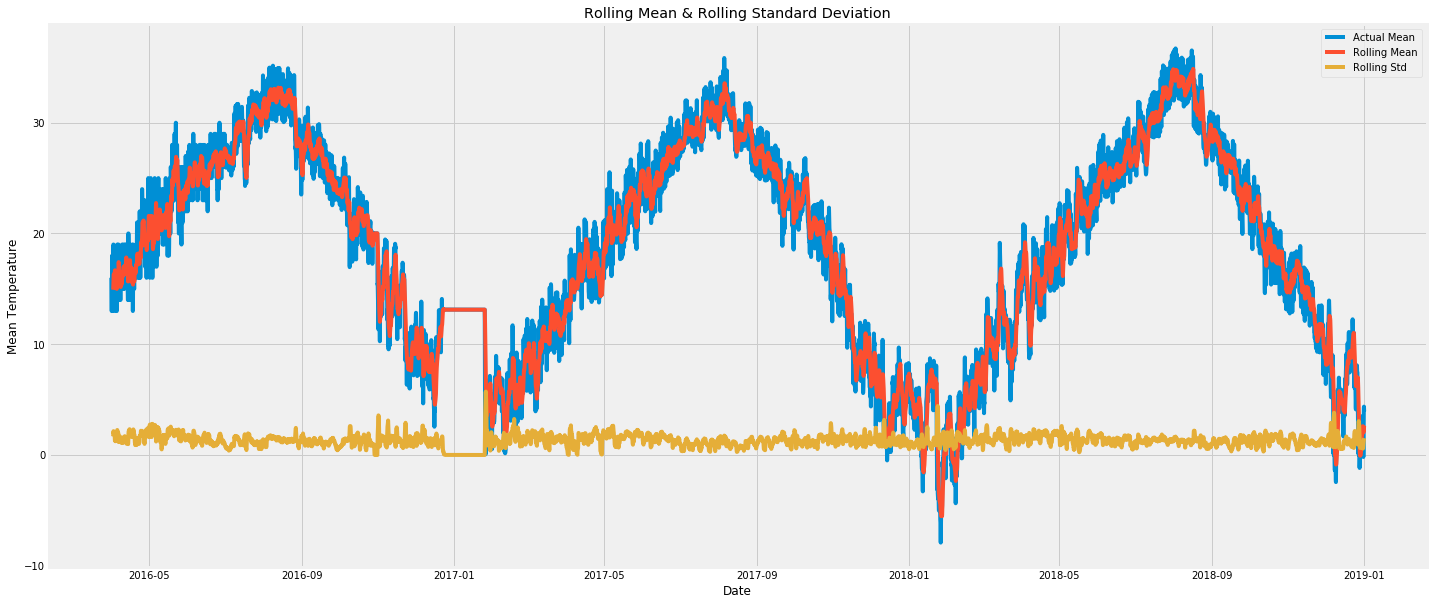

Test statistic:  -1.4352227886455617
Critical Values: {'1%': -3.431167368324836, '5%': -2.8619012182527506, '10%': -2.5669622717722578}


In [15]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df['plant1_train.tem_in_loc1'])
perform_dickey_fuller_test(train_df['plant1_train.tem_in_loc1'])

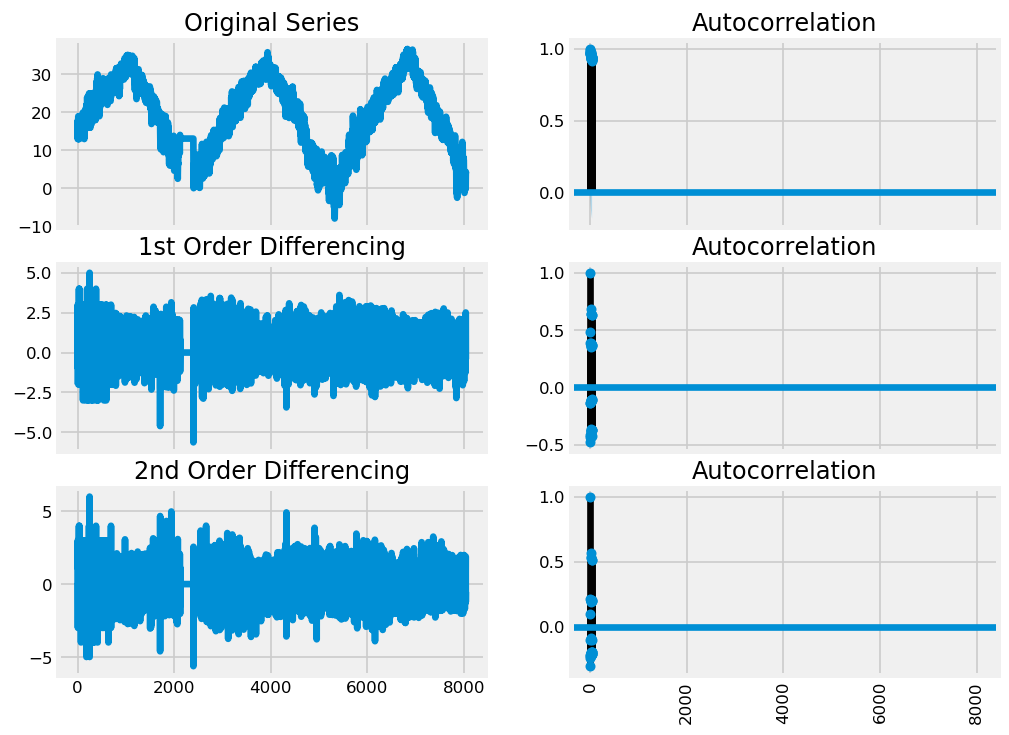

In [16]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_df.values); 
axes[0, 0].set_title('Original Series')
plot_acf(train_df.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train_df['plant1_train.tem_in_loc1'].diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_df.diff().dropna().values,ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train_df['plant1_train.tem_in_loc1'].diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_df.diff().diff().dropna().values,ax=axes[2, 1])

plt.xticks(rotation='vertical')
plt.show()

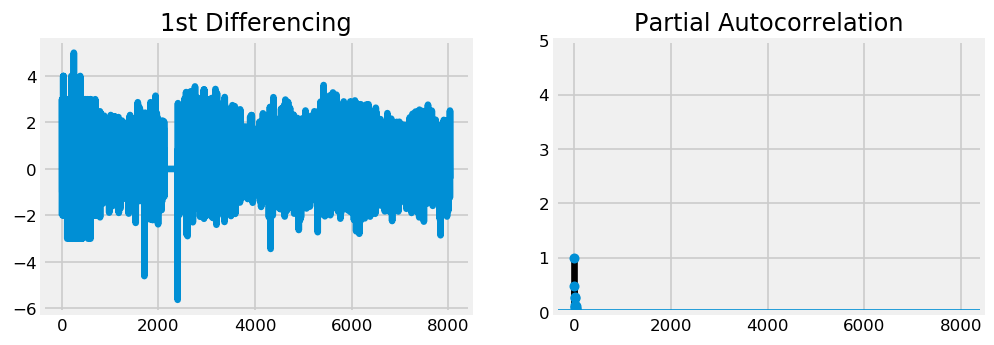

In [17]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(train_df.diff().dropna().values, ax=axes[1])

plt.show()

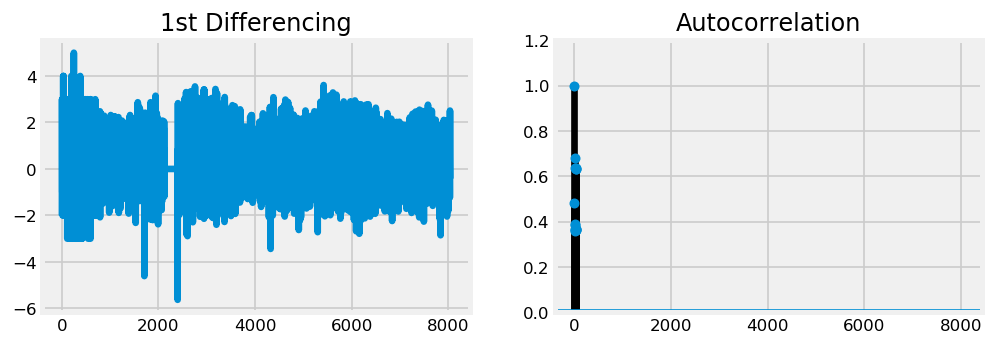

In [18]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_df.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train_df.diff().dropna().values, ax=axes[1])

plt.show()

C:\Users\fu\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


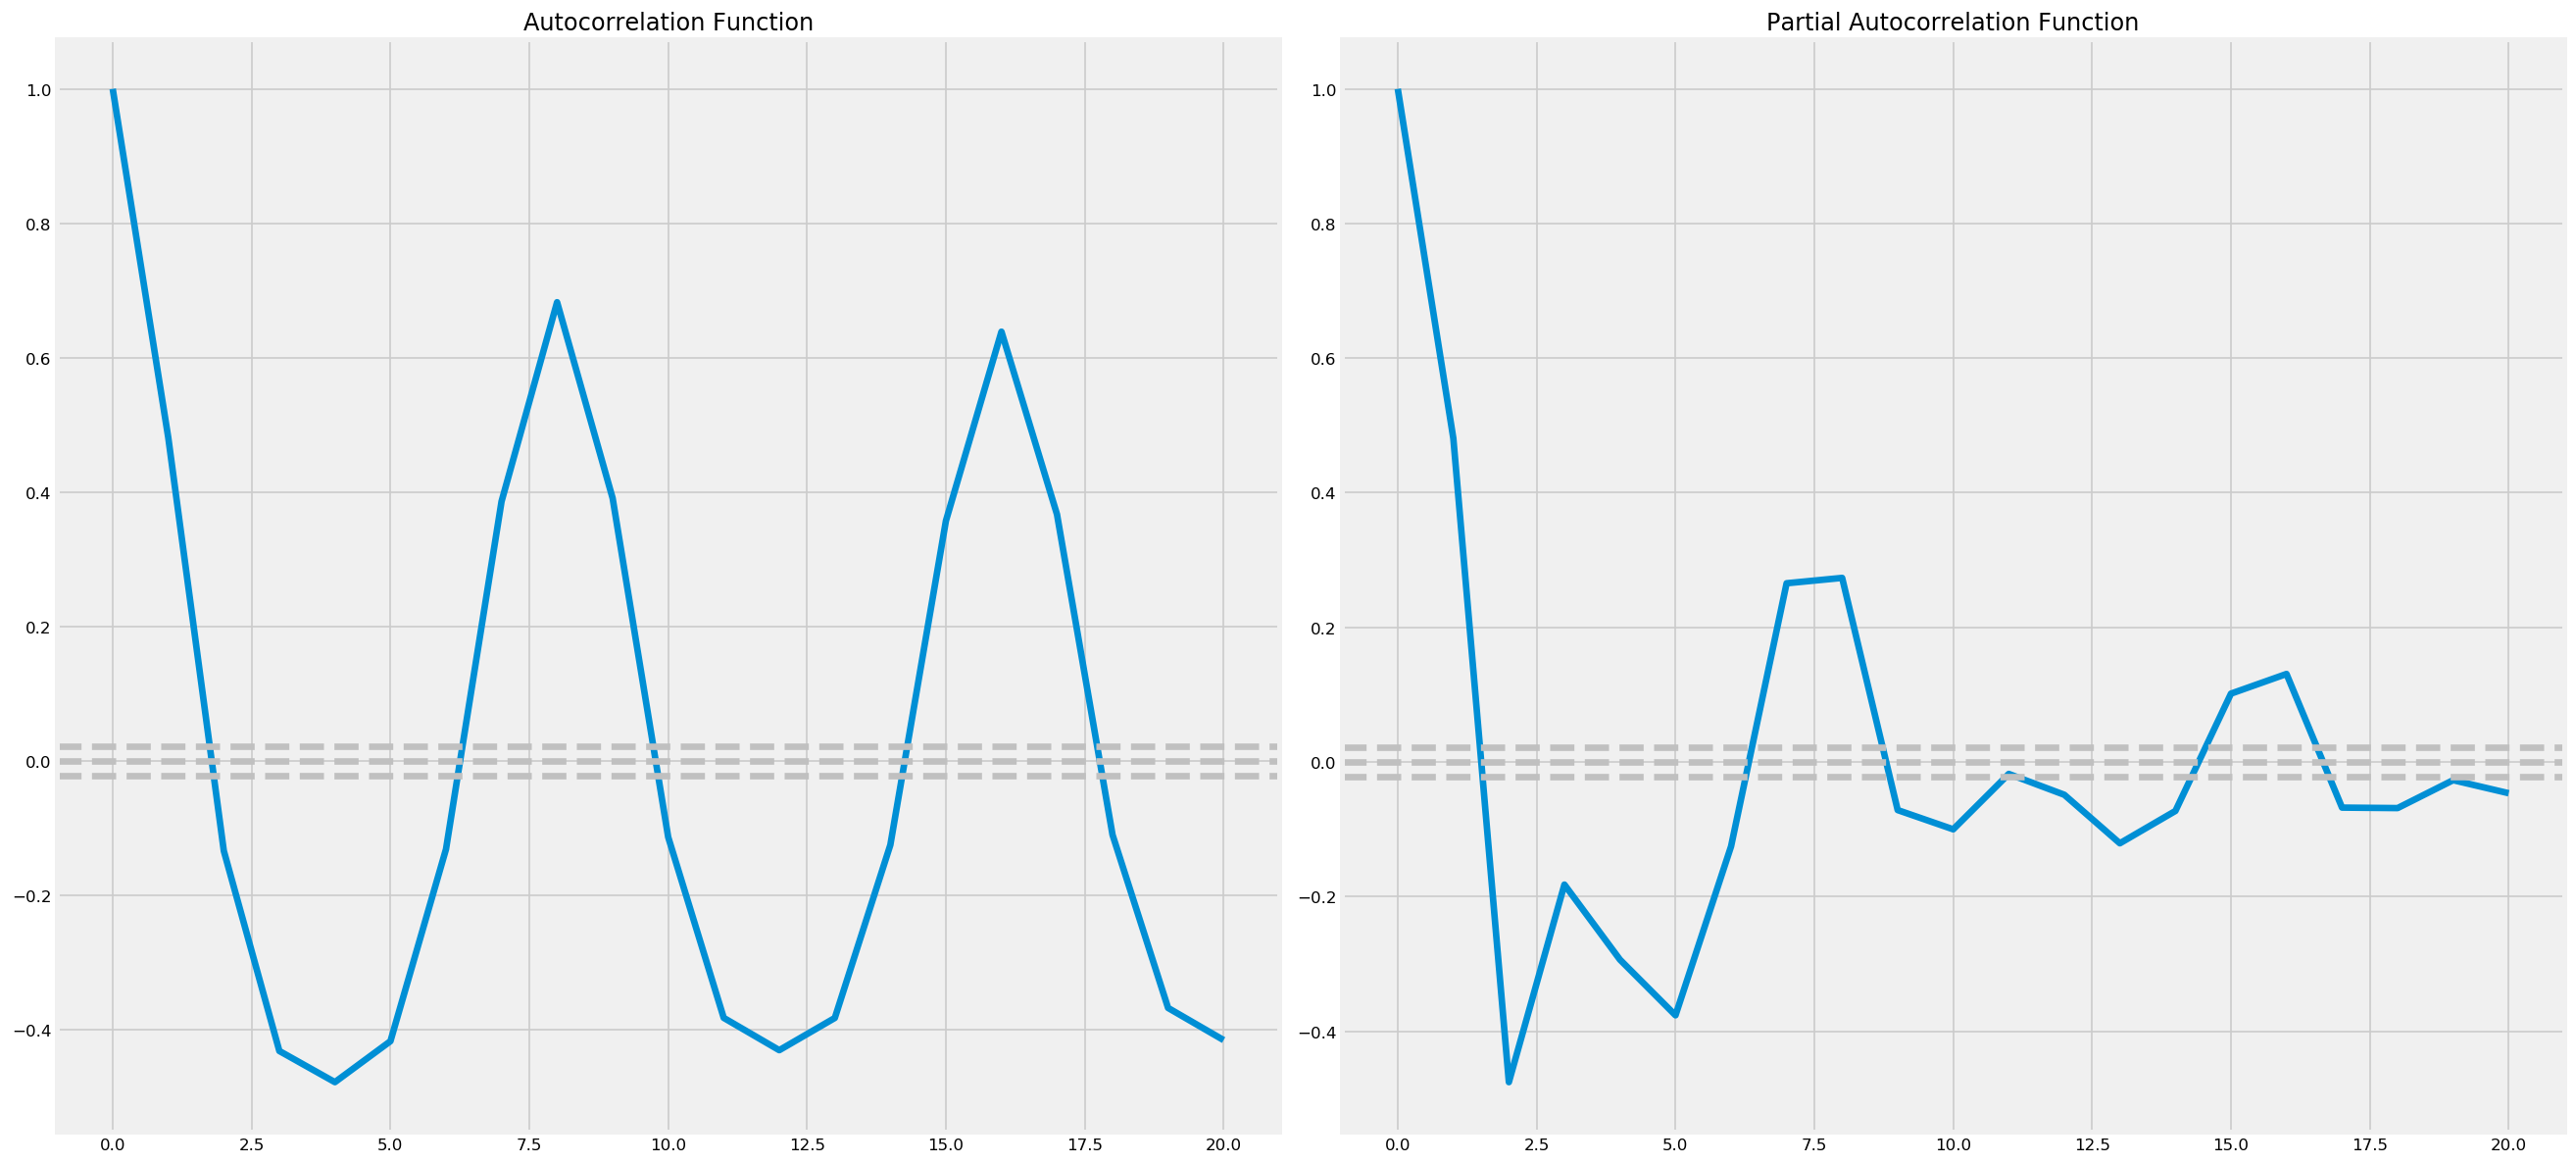

In [19]:
acf_lag = acf(train_df.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [48]:
model = ARIMA(train_df.values, order=(5,0,2))  #2,0,2
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 8512
Model:                     ARMA(5, 2)   Log Likelihood               -8481.076
Method:                       css-mle   S.D. of innovations              0.655
Date:                Wed, 24 Jun 2020   AIC                          16980.152
Time:                        03:52:42   BIC                          17043.595
Sample:                             0   HQIC                         17001.801
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7582      3.273      5.426      0.000      11.344      24.173
ar.L1.y        2.6629        nan        nan        nan         nan         nan
ar.L2.y       -3.4087        nan        nan        n

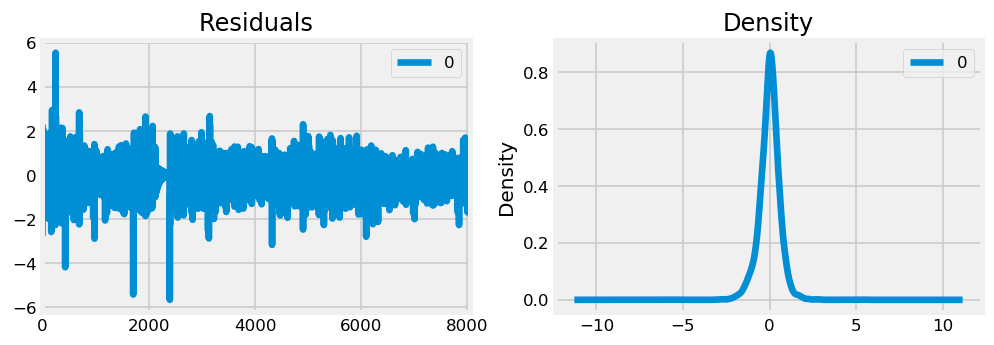

In [22]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

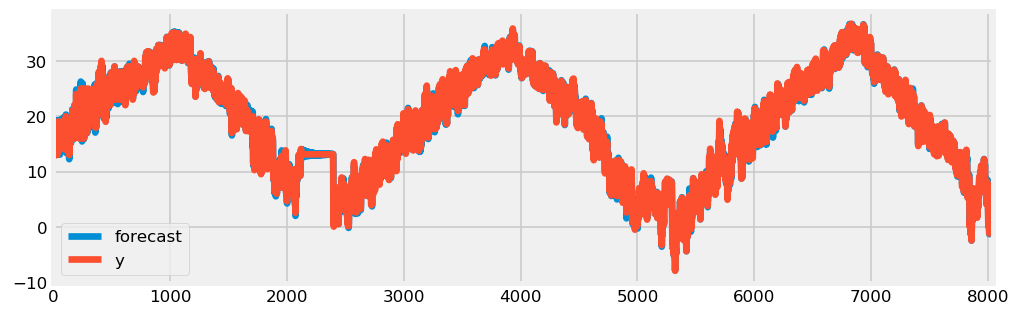

In [23]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

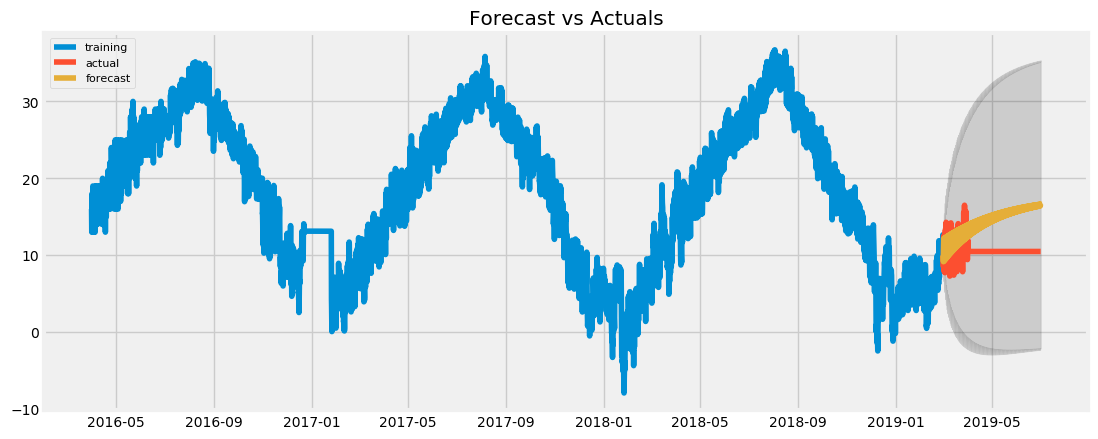

In [49]:
# # Forecast
fc, se, conf = model_fit.forecast(975, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
# test_df.index

from sklearn.svm import SVR

svr = SVR(kernel='linear',  gamma='auto', tol=0.001, C=1.0, verbose=False, max_iter=-1)
svr.fit(train_df,test_df)
model.predict(train_df)
model.predict_proba(train_df)

In [ ]:
output=pd.DataFrame({'Time Series':test_df.index, 'First_Predict':fc})

In [ ]:
output.to_csv("C:/Users/fu/Downloads/Test3.csv", index=False)

In [ ]:
print(test_df)